<a href="https://colab.research.google.com/github/LuchoGabba/qibo/blob/main/application_colab.ipynb"> <img src='https://colab.research.google.com/assets/colab-badge.svg' /> </a>

# Talk from Stefano Carrazza

Quantum simulation with a hardware acceleration, [arXiv:2009.01845](https://arxiv.org/abs/2009.01845).

Follow this video: https://www.youtube.com/watch?v=Aoc4nLmplTE

## Install Qibo

In [3]:
!pip install qibo

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 180.0/180.0 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 260.7/260.7 kB 16.6 MB/s eta 0:00:00


In [ ]:
!nvidia-smi

Sat Oct 28 23:12:23 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   42C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## Check version

In [4]:
import qibo, sys
import tensorflow as tf
print('Python version:', sys.version)
print('Tensorflow version', tf.__version__)
print('Qibo version', qibo.__version__)

Python version: 3.10.12 (main, Jun 11 2023, 05:26:28) [GCC 11.4.0]
Tensorflow version 2.14.0
Qibo version 0.2.1


## Quantum cicuits in Qibo

We can change to GPU:

* Runtime/Entorno de ejecución
* Change runtime type/Cambiar tipo de entorno de ejecución
* Select T4 GPU

It's pretty faster than in CPU.

In [36]:
%%time
from qibo.models import QFT

c = QFT(25)
result = c()

CPU times: user 3.67 s, sys: 1.39 s, total: 5.07 s
Wall time: 34.3 s


To access the final state in Dirac notation execute `c.final_state`.

In [37]:
c.final_state

(0.00017+0j)|0000000000000000000000000> + (0.00017+0j)|0000000000000000000000001> + (0.00017+0j)|0000000000000000000000010> + (0.00017+0j)|0000000000000000000000011> + (0.00017+0j)|0000000000000000000000100> + (0.00017+0j)|0000000000000000000000101> + (0.00017+0j)|0000000000000000000000110> + (0.00017+0j)|0000000000000000000000111> + (0.00017+0j)|0000000000000000000001000> + (0.00017+0j)|0000000000000000000001001> + (0.00017+0j)|0000000000000000000001010> + (0.00017+0j)|0000000000000000000001011> + (0.00017+0j)|0000000000000000000001100> + (0.00017+0j)|0000000000000000000001101> + (0.00017+0j)|0000000000000000000001110> + (0.00017+0j)|0000000000000000000001111> + (0.00017+0j)|0000000000000000000010000> + (0.00017+0j)|0000000000000000000010001> + (0.00017+0j)|0000000000000000000010010> + (0.00017+0j)|0000000000000000000010011> + ...

To get the matrix representation, execute `.state()`.

We obtain a vector of dimension $2^{25}$ with double precision

In [38]:
print(result.state())
print('\nIn numpy:')
# Or in numpy
print(result.state(numpy=True))

tf.Tensor(
[0.00017263+0.j 0.00017263+0.j 0.00017263+0.j ... 0.00017263+0.j
 0.00017263+0.j 0.00017263+0.j], shape=(33554432,), dtype=complex128)

In numpy:
[0.00017263+0.j 0.00017263+0.j 0.00017263+0.j ... 0.00017263+0.j
 0.00017263+0.j 0.00017263+0.j]


In [41]:
print(result.state().dtype)

<dtype: 'complex128'>


## Quantum Fourier Transform

We can implement a QFT circuit by hand.

Let us try with a simpler cicuit, 4 qubits, with less qubits, to shorten the diagram.

In [13]:
from qibo import Circuit, gates
import numpy as np
nqubits = 4
circuit = Circuit(nqubits)

# Add gates
for i1 in range(nqubits):
  circuit.add(gates.H(i1))
  for i2 in range(i1+1, nqubits):
    theta = np.pi / 2 ** (i2-i1)
    circuit.add(gates.CU1(i2,i1, theta))

print(circuit.draw())
print()
print(circuit.summary())

q0: ─H─U1─U1─U1────────────────
q1: ───o──|──|──H─U1─U1────────
q2: ──────o──|────o──|──H─U1───
q3: ─────────o───────o────o──H─

Circuit depth = 7
Total number of gates = 10
Number of qubits = 4
Most common gates:
cu1: 6
h: 4


In [14]:
%%time
circuit()

CPU times: user 42.5 ms, sys: 0 ns, total: 42.5 ms
Wall time: 41.8 ms


(0.25+0j)|0000> + (0.25+0j)|0001> + (0.25+0j)|0010> + (0.25+0j)|0011> + (0.25+0j)|0100> + (0.25+0j)|0101> + (0.25+0j)|0110> + (0.25+0j)|0111> + (0.25+0j)|1000> + (0.25+0j)|1001> + (0.25+0j)|1010> + (0.25+0j)|1011> + (0.25+0j)|1100> + (0.25+0j)|1101> + (0.25+0j)|1110> + (0.25+0j)|1111>

Which is a vector with $2^4=16$ dimensions.

## Performing measurements

In [31]:
circuit = Circuit(2)
circuit.add(gates.RY(0, theta=np.pi / 3))
circuit.add(gates.RY(1, theta=np.pi / 2))
circuit.add(gates.M(0))
circuit.add(gates.M(1))

shots = circuit(nshots=1000)
print(shots)

(0.61237+0j)|00> + (0.61237+0j)|01> + (0.35355+0j)|10> + (0.35355+0j)|11>


In [32]:
shots.samples(binary=True)

array([[0, 0],
       [1, 0],
       [1, 1],
       ...,
       [0, 0],
       [0, 0],
       [1, 0]], dtype=int32)

In [33]:
shots.frequencies()

Counter({'00': 419, '10': 129, '11': 120, '01': 332})

Plot results in a histogram

In [34]:
import matplotlib
import matplotlib.pyplot as plt
# from matplotlib import animation
matplotlib.rcParams['mathtext.fontset'] = 'cm'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams["font.size"] = 10

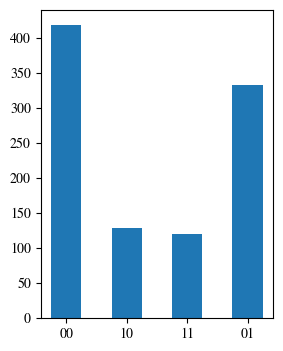

In [35]:
labels, values = zip(*shots.frequencies().items())
plt.figure(figsize=(3,4))
plt.bar(labels, values, width=0.5)
plt.show()

## Managing simulation deviced

Qibo uses Tensorflow to perform the linear algebra calculations required for the simulation of quantum circuits. It is possible to view the devices that are available to Tensorflow:

In [42]:
print(tf.config.list_physical_devices())

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [43]:
import time
qibo.set_device("/CPU:0")

circuit = Circuit(25)
circuit.add((gates.H(i) for i in range(circuit.nqubits)))

start_time = time.time()
final_state = circuit()
print("Time elapsed:", time.time() - start_time)

[Qibo 0.2.1|INFO|2023-10-29 16:12:29]: Using tensorflow backend on /CPU:0
INFO:qibo.config:Using tensorflow backend on /CPU:0


Time elapsed: 247.2311589717865


In [44]:
qibo.set_device("/GPU:0")

circuit = Circuit(25)
circuit.add((gates.H(i) for i in range(circuit.nqubits)))

start_time = time.time()
final_state = circuit()
print("Time elapsed:", time.time() - start_time)

[Qibo 0.2.1|INFO|2023-10-29 16:16:36]: Using tensorflow backend on /GPU:0
INFO:qibo.config:Using tensorflow backend on /GPU:0


Time elapsed: 0.03386998176574707


### Executing on multiple-GPUs

Execute circuits on multiple GPUs with `accelerators` dictionary specifying which devices to use when creating the circuit:

In [47]:
circuit = Circuit(30)
print(circuit)

circuit = Circuit(30, accelerators={"/GPU:0": 1, "/GPU:1": 1})
print(circuit)

The implementation of `DistributedCircuit`is based on standard techniques of multi-node quantum simulation (see Sec. 3.4 of [arXiv:1704.01127](https://arxiv.org/abs/1704.01127)).